In [2]:
import pandas as pd

In [30]:
df = pd.read_csv('salaries.csv')
df

,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0
5,google,computer programmer,masters,1
6,abc pharma,sales executive,masters,0
7,abc pharma,computer programmer,bachelors,0
8,abc pharma,business manager,bachelors,0
9,abc pharma,business manager,masters,1


In [31]:
x = df.drop('salary_more_then_100k', axis='columns')
y = df['salary_more_then_100k']

In [32]:
from sklearn.preprocessing import LabelEncoder

company = LabelEncoder()
job = LabelEncoder()
edu = LabelEncoder()

In [33]:
x['companyEnc'] = company.fit_transform(x['company'])
x['jobEnc'] = job.fit_transform(x['job'])
x['eduEnc'] = edu.fit_transform(x['degree'])

x

,company,job,degree,companyEnc,jobEnc,eduEnc
0,google,sales executive,bachelors,2,2,0
1,google,sales executive,masters,2,2,1
2,google,business manager,bachelors,2,0,0
3,google,business manager,masters,2,0,1
4,google,computer programmer,bachelors,2,1,0
5,google,computer programmer,masters,2,1,1
6,abc pharma,sales executive,masters,0,2,1
7,abc pharma,computer programmer,bachelors,0,1,0
8,abc pharma,business manager,bachelors,0,0,0
9,abc pharma,business manager,masters,0,0,1


In [34]:
x = x.drop(['company', 'job', 'degree'], axis='columns')
x

,companyEnc,jobEnc,eduEnc
0,2,2,0
1,2,2,1
2,2,0,0
3,2,0,1
4,2,1,0
5,2,1,1
6,0,2,1
7,0,1,0
8,0,0,0
9,0,0,1


In [35]:
from sklearn import tree

model = tree.DecisionTreeClassifier(criterion='gini')

model.fit(x, y)

DecisionTreeClassifier()

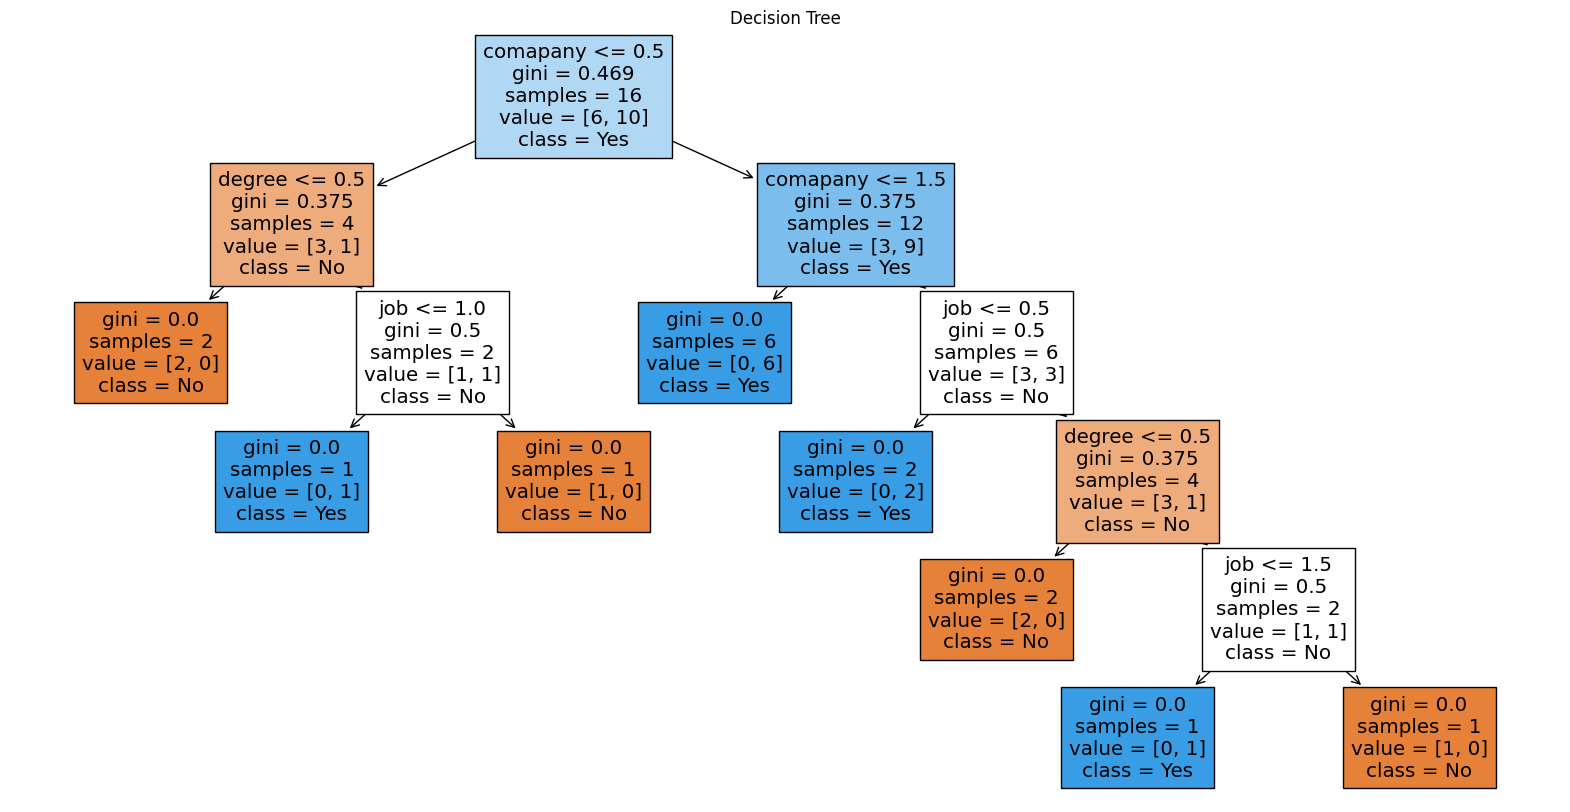

In [47]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(20,10))
plot_tree(model, feature_names=['comapany', 'job', 'degree'] , class_names=['No', 'Yes'], filled=True)
plt.title('Decision Tree')
plt.show()